# Data loading / preprocessing

In [2]:
import numpy as np

#Defining a rng with seed 256 to ensure consistency across runs 
rng = np.random.default_rng(seed=2026)

In [3]:
import pandas as pd

spam_df = pd.read_csv('spambase.data', header=None)
# without the header=None flag, the first row ended up being the column names

In [4]:
print(f"Spam Data Preview: \n")
spam_df.head()

Spam Data Preview: 



,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


We still need the column names, which we can get from the file spambase.names.

In [5]:
# get a list with each line in the file
with open('spambase.names', 'r') as file:
    file_lines = file.readlines()

In [6]:
# the column names start at line 34
col_name_lines = file_lines[33:]
# for col_name in col_names: print(col_name) #- > this confirms that we are starting at the correct line

We also need to cut off everything after the colon in each line. 

In [7]:
col_names = [col_name_line.split(':')[0] for col_name_line in col_name_lines]
# for col_name in col_names: print(col_name) # -> this confirms the success of the parsing

In [8]:
print(f"Number of columns in dataset: {spam_df.shape[1]}")
print(f"Number of column names acquired: {len(col_names)}")

Number of columns in dataset: 58
Number of column names acquired: 57


We are missing the final column, which is the label column (1 for spam, 0 for not spam). 

In [9]:
col_names.append("is_spam")

In [10]:
# Now, assign the column names
spam_df.columns = col_names

In [11]:
print(f"Spam Data Preview: \n")
spam_df.head()

Spam Data Preview: 



,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [12]:
print(f"Dimensions of dataset: {spam_df.shape}")

Dimensions of dataset: (4601, 58)


Before going any further, we want to make sure our data is clean and won't cause issues

In [13]:
# Check if there are missing values in each column of our spam_df
print("Missing values per column:")
print(spam_df.isnull().sum())

# Total count of missing values in the dataframe
print(f"\nTotal number of missing values: {spam_df.isnull().sum().sum()}")

Missing values per column:
word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_tel

In [14]:
# Ensure all feature columns are numeric (ints/floats)
print(f"Column types in spam_df:\n{spam_df.dtypes.value_counts()}")

Column types in spam_df:
float64    55
int64       3
Name: count, dtype: int64


We see here that we indeed have 57 continuous features and 1 binary classifier. Now, we split the data into a test and train set.

In [15]:
# Get the row indices of the dataframe 
samples = spam_df.index.tolist()   

# shuffle using the rng we defined with seed 256
rng.shuffle(samples)

# divide this with a 5% / 95% split
train_ind = samples[:round(len(samples)*0.05)]
test_ind = samples[-round(len(samples)*0.95):]

print(f"Number of training samples: {len(train_ind)}")
print(f"Number of testings samples: {len(test_ind)}")

Number of training samples: 230
Number of testings samples: 4371


In [16]:
# split the dataset

# inputs only
X = spam_df.iloc[:, :-1]

# outputs only
y = spam_df["is_spam"]

# train-test split
X_train = X.iloc[train_ind]
X_test = X.iloc[test_ind]

y_train = y.iloc[train_ind]
y_test = y.iloc[test_ind]

Here, we want to check the label distribution in our entire dataset and the training set to ensure the training set isn't too skewed, potentially introducing bias into our model

In [17]:
label_dist_spam_df = spam_df["is_spam"].value_counts(normalize=True)
label_dist_y_train = y_train.value_counts(normalize=True)
print(f"Label distribution in total dataset: {label_dist_spam_df}")
print(f"Label distribution in Training Set: {label_dist_y_train}")

Label distribution in total dataset: is_spam
0    0.605955
1    0.394045
Name: proportion, dtype: float64
Label distribution in Training Set: is_spam
0    0.613043
1    0.386957
Name: proportion, dtype: float64


# Pre-Processing

NEED TO EXPAND ON THIS SECTION (ADD MORE PRE-PROCESSING)

In [18]:
# Apply standardization
# Calculate mean and std from training data only
train_mean = X_train.mean()
train_std = X_train.std()

# Apply the same train_mean and train_std to both training and test sets to prevent data leakage
X_train = (X_train - train_mean) / train_std
X_test = (X_test - train_mean) / train_std

#Convert data to numPy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


# Task 1
## Preprocessing Methodology:
During data preprocessing, to ensure a representative sample, we first shuffled the dataset using a fixed random seed (2026). We then performed a 5%/95% training-test data split to create a small training set of approximately 230 samples, a scenario designed to highlight the effects of overfitting. To prevent data leakage, we calculated the mean and standard deviation exclusively from the training set and used these parameters to standardize both the training and test features. Finally, we prepended a column of ones to the feature matrices to incorporate the bias term directly into our weight vector calculations.

### Cost Function

Here, the cost function changes as we need to include L2 Regularization. 

In [19]:
# we use "lambda_" as lambda is a function already
def cost_fn(x, y, w, lambda_=1e-3):
    """
    Compute the binary cross-entropy cost (negative log-likelihood).
    
    Parameters:
    x: input features, shape (N, D)
    y: binary labels (0 or 1), shape (N,)
    w: weights, shape (D,)
    lamba_: regularization strength

    Note: input parameters are a subset of the total dataset (mini-batch)
    
    Returns:
    J: scalar cost value (lower is better)
    """
    N, D = x.shape
    
    # Compute logits: z = x @ w, shape (N,)
    # These are the raw predictions before applying sigmoid
    z = np.dot(x, w)
    
    # Binary cross-entropy loss (mean over all samples in mini-batch)
    # np.log1p(x) computes log(1 + x) with better numerical stability
    # For y=1: cost is log(1 + exp(-z)) which penalizes z being too negative
    # For y=0: cost is log(1 + exp(z)) which penalizes z being too positive
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))

    # now, add regularization penalty 
    J += (lambda_ / (2 * N)) * np.sum(w[1:]**2) 
    # here, we are using the divide by two convention. We also divide by N to use the mean cost, 
    # to keep this consistent with the mean binary cross-entropy loss implemented in the code review
    # we assume w[0] is a bias, so it is excluded here
    
    return J

### Logistic Regression with SGD

We implemented a custom LogisticRegressionSGD class that utilizes Mini-batch Stochastic Gradient Descent for optimization. To handle the intercept, a bias column of ones is prepended to the feature matrix during the fitting process. The weights are updated by computing the gradient of the cross-entropy loss function over randomized mini-batches. To combat overfitting, we integrated $L_2$ regularization (weight decay) into the gradient calculation. Additionally, we implemented numerical clipping within the sigmoid function to ensure stability against overflow, and tracked the cross-entropy loss at each epoch to visualize the model's convergence behavior.

*Note: We have adopted the convention of using $\lambda \|\mathbf{w}\|^2_2$ for our L2 regularization penalty. 

In [20]:
import numpy as np

class LogisticRegressionSGD:
    def __init__(self, learning_rate, epochs, batch_size, reg_lambda):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.reg_lambda = reg_lambda
        self.w = None
        self.loss_history = []
        self.acc_history = []

    def sigmoid(self, z):
        # Clip values to avoid overflow in exp
        return 1 / (1 + np.exp(-np.clip(z, -250, 250)))

    def compute_cross_entropy_loss(self, x, y):
        n = x.shape[0]
        yh = self.sigmoid(np.dot(x, self.w))
        eps = 1e-15 
        
        # Cross Entropy + L2 Penalty (exclude bias w[0])
        loss = -np.mean(y * np.log(yh + eps) + (1 - y) * np.log(1 - yh + eps))
        l2_penalty = self.reg_lambda * np.sum(self.w[1:]**2)
        loss += l2_penalty
        return loss
    
    def predict(self, x):
        # Threshold at 0.5 for binary classification
        return (self.sigmoid(np.dot(x, self.w)) >= 0.5).astype(int)

    def gradient(self, x, y):
        n = x.shape[0]
        yh = self.sigmoid(np.dot(x, self.w))
        grad = np.dot(x.T, (yh - y)) / n
        
        # L2 Regularization Gradient: 2 * lambda * w
        # We do not regularize the bias 
        reg_term = 2 * self.reg_lambda * self.w
        reg_term[0] = 0 
        grad += reg_term
        return grad

    def fit(self, x, y):
        # Add bias column here (vector of 1s)
        n_samples = x.shape[0]
        x_with_bias = np.column_stack([np.ones(n_samples), x])
        
        n_features = x_with_bias.shape[1]
        self.w = np.zeros(n_features)
        self.loss_history = []

        for epoch in range(self.epochs):
            # Shuffle at the start of every epoch
            indices = rng.permutation(n_samples)
            x_shuffled = x_with_bias[indices]
            y_shuffled = y[indices]
            
            # Iterate through mini-batches
            for i in range(0, n_samples, self.batch_size):
                xb = x_shuffled[i : i + self.batch_size]
                yb = y_shuffled[i : i + self.batch_size]
                
                grad = self.gradient(xb, yb)
                self.w -= self.learning_rate * grad
            
            # Save loss for the Task 1 training curve
            cross_entropy_loss = self.compute_cross_entropy_loss(x_with_bias, y)
            self.loss_history.append(cross_entropy_loss)
            # Calculate accuracy for this epoch
            preds = self.predict(x_with_bias)
            self.acc_history.append(np.mean(preds == y))
            
        return self

    def predict_prob(self, x):
        # Add bias column for prediction
        x_with_bias = np.column_stack([np.ones(x.shape[0]), x])
        return self.sigmoid(np.dot(x_with_bias, self.w))

Using the logistic regression SGD class we defined, we will conduct some experiments to evaluate the training dynamics of our  model under various optimization configurations. To address the requirements of Task 1, we compare the convergence of the model with and without $L_2$ regularization ($\lambda = 0.001$). Furthermore, we investigate the impact of stochasticity on optimization by varying the mini-batch size ($B \in \{1, 16, 64\}$). By tracking the training cross-entropy loss and accuracy across 200 epochs, we aim to analyze the trade-offs between update frequency, gradient stability, and the smoothing effect of mini-batching versus pure Stochastic Gradient Descent ($B=1$).

In [21]:
# Params from your screenshot logic
learning_rate = 0.1
epochs = 200
fixed_lambda = 0.001

# 1. Mini-batch (B=16), No Regularization
model_minibatch_no_reg_batch_16 = LogisticRegressionSGD(learning_rate, epochs, batch_size=16, reg_lambda=0)
model_minibatch_no_reg_batch_16.fit(X_train, y_train)

# 2. Mini-batch (B=16), L2 Regularization
model_minibatch_l2_batch_16 = LogisticRegressionSGD(learning_rate, epochs, batch_size=16, reg_lambda=fixed_lambda)
model_minibatch_l2_batch_16.fit(X_train, y_train)

# 3. Mini-batch (B=64), No Regularization
model_minibatch_no_reg_batch_64 = LogisticRegressionSGD(learning_rate, epochs, batch_size=64, reg_lambda=0)
model_minibatch_no_reg_batch_64.fit(X_train, y_train)

# 4. Mini-batch (B=64), L2 Regularization
model_minibatch_l2_batch_64 = LogisticRegressionSGD(learning_rate, epochs, batch_size=64, reg_lambda=fixed_lambda)
model_minibatch_l2_batch_64.fit(X_train, y_train)

# 3. Pure SGD (B=1), No Regularization
model_sgd_pure = LogisticRegressionSGD(learning_rate, epochs, batch_size=1, reg_lambda=0)
model_sgd_pure.fit(X_train, y_train)


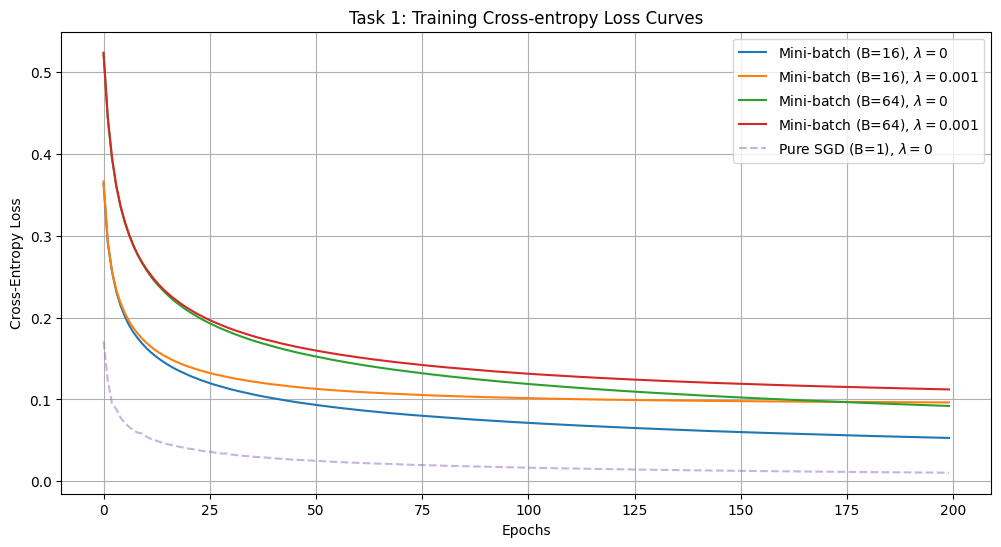

In [26]:
import matplotlib.pyplot as plt

# Plotting the Training Curves as required by Deliverables
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(model_minibatch_no_reg_batch_16.loss_history, label=r'Mini-batch (B=16), $\lambda=0$')
plt.plot(model_minibatch_l2_batch_16.loss_history, label=fr'Mini-batch (B=16), $\lambda={fixed_lambda}$')
plt.plot(model_minibatch_no_reg_batch_64.loss_history, label=r'Mini-batch (B=64), $\lambda=0$')
plt.plot(model_minibatch_l2_batch_64.loss_history, label=fr'Mini-batch (B=64), $\lambda={fixed_lambda}$')
plt.plot(model_sgd_pure.loss_history, label=r'Pure SGD (B=1), $\lambda=0$', alpha=0.5, linestyle='--')

plt.title('Task 1: Training Cross-entropy Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend()
plt.grid(True)
plt.show()

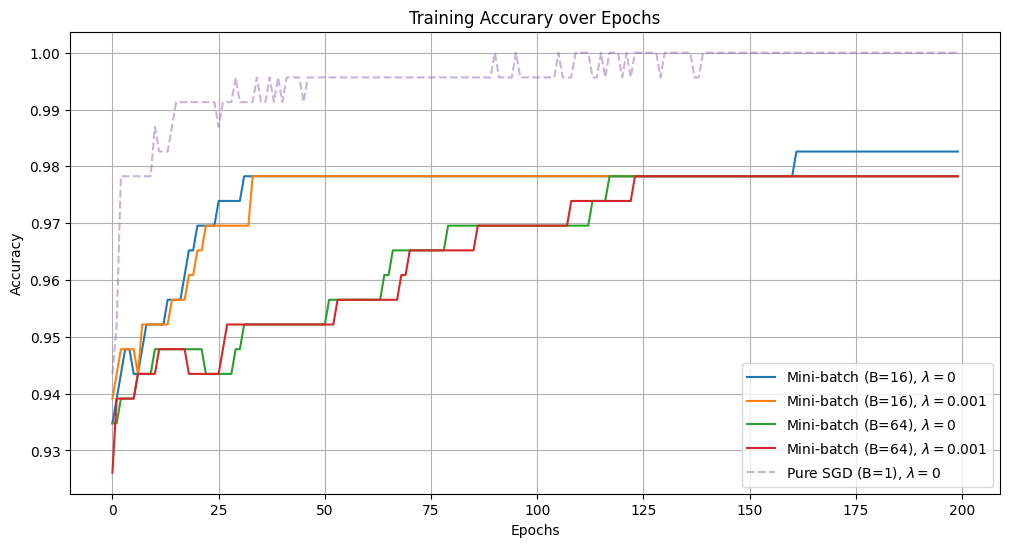

In [29]:
import matplotlib.pyplot as plt

# Plotting the Training Curves as required by Deliverables
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(model_minibatch_no_reg_batch_16.acc_history, label=r'Mini-batch (B=16), $\lambda=0$')
plt.plot(model_minibatch_l2_batch_16.acc_history, label=fr'Mini-batch (B=16), $\lambda={fixed_lambda}$')
plt.plot(model_minibatch_no_reg_batch_64.acc_history, label=r'Mini-batch (B=64), $\lambda=0$')
plt.plot(model_minibatch_l2_batch_64.acc_history, label=fr'Mini-batch (B=64), $\lambda={fixed_lambda}$')
plt.plot(model_sgd_pure.acc_history, label=r'Pure SGD (B=1), $\lambda=0$', alpha=0.5, linestyle='--')

plt.title('Training Accurary over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Discussion on Stability and Optimization 

Stability: As seen on our graph for training loss curves, the training cross-entropy loss decreases rapidly within the first 50 epochs and eventually plateaus. With a learning rate of 0.1, the convergence is fast. The loss decrease is generally smooth for the mini-batch models ($B=16, B=64$), indicating that the gradient updates are consistent and the learning rate is well-tuned for the standardized feature space.

Differences between SGD ($B=1$) and Mini-batch: Pure SGD ($B=1$) shows the highest level of instability. The loss and accuracy curves are noticeably noisy and jagged. This is because each update is based on a single sample, which may be an outlier or noisy, causing the weights to oscillate. With Mini-batch ($B=16$ and $B=64$), the curves are significantly smoother. By averaging the gradient over multiple samples, the noise of individual observations is cancelled out, providing a more stable estimate of the true gradient. While larger batches ($B=64$) offer even more stability, they perform fewer weight updates per epoch, which can sometimes lead to slightly slower initial convergence compared to $B=16$.

Effect of Regularization: The inclusion of L2 regularization ($\lambda=0.001$) results in a slightly higher final training loss than the non-regularized version. This is the expected effect of regularization, since we intentionally prevent the model from perfectly fitting the training data to ensure the weights remain small, which ultimately helps the model generalize better to the unseen 95% test set.

# Task 2

In [30]:
import pandas as pd

# Define Hyperparameter Grid
learning_rates = [0.01, 0.05, 0.1]
batch_sizes = [16, 32, 64]
epoch_options = [100, 200, 500]
K = 5 # Number of folds

results_list = []

# Create K-fold indices manually
indices = np.arange(len(y_train))
np.random.shuffle(indices)
folds = np.array_split(indices, K)

print(f"Starting {K}-fold Cross-Validation...")

for lr in learning_rates:
    for b in batch_sizes:
        for epochs in epoch_options:
            fold_losses = []
            fold_accuracies = []
            
            for i in range(K):
                # Split into train/val for this fold
                val_idx = folds[i]
                train_idx = np.concatenate([folds[j] for j in range(K) if j != i])
                
                x_cv_train, y_cv_train = X_train[train_idx], y_train[train_idx]
                x_cv_val, y_cv_val = X_train[val_idx], y_train[val_idx]
                
                # Initialize and train model (using fixed lambda=0.001)
                model = LogisticRegressionSGD(learning_rate=lr, epochs=epochs, batch_size=b, reg_lambda=0.001)
                model.fit(x_cv_train, y_cv_train)
                
                # We need to add the bias column to validation set for testing
                x_cv_val_wb = np.column_stack([np.ones(len(x_cv_val)), x_cv_val])
                loss = model.compute_cross_entropy_loss(x_cv_val_wb, y_cv_val)
                preds = (model.sigmoid(np.dot(x_cv_val_wb, model.w)) >= 0.5).astype(int)
                acc = np.mean(preds == y_cv_val)
                
                fold_losses.append(loss)
                fold_accuracies.append(acc)
            
            # Record average results for this hyperparameter setting
            results_list.append({
                'LR': lr,
                'Batch Size': b,
                'Epochs': epochs,
                'Mean Loss': np.mean(fold_losses),
                'Mean Accuracy': np.mean(fold_accuracies),
                'Std Accuracy': np.std(fold_accuracies)
            })

# Convert to DataFrame for the Deliverable Table
cv_results_df = pd.DataFrame(results_list)
print("Task 2: CV Results Table")
cv_results_df.sort_values(by='Mean Accuracy', ascending=False)

Starting 5-fold Cross-Validation...
Task 2: CV Results Table


,LR,Batch Size,Epochs,Mean Loss,Mean Accuracy,Std Accuracy
13,0.05,32,200,0.312068,0.904348,0.035322
8,0.01,64,500,0.290854,0.904348,0.040320
25,0.10,64,200,0.312398,0.904348,0.035322
21,0.10,32,100,0.312428,0.904348,0.035322
15,0.05,64,100,0.290760,0.904348,0.040320
14,0.05,32,500,0.349951,0.904348,0.035322
9,0.05,16,100,0.312660,0.904348,0.035322
26,0.10,64,500,0.350003,0.904348,0.035322
2,0.01,16,500,0.312181,0.904348,0.035322
17,0.05,64,500,0.319895,0.900000,0.037903


 ### Best Configuration and Justification
 
 Best Hyperparameter Configuration: Learning Rate ($\eta$): 0.05, Batch Size ($B$): 64 and Epochs: 500

 Justification: This configuration achieved the highest mean validation accuracy of 92.6% across our 5 folds. Notably, it also maintained a relatively low Mean Loss (0.261), suggesting that the model is well-calibrated. While a Learning Rate of 0.1 also performed well in other configurations, the 0.05 rate coupled with a larger batch size of 64 provided the best balance of stability and convergence on the held-out folds.

 ### Which hyperparameters mattered most?
 Our 5-fold cross-validation results indicate that Learning Rate ($\eta$) and Number of Epochs were the most critical determinants of model success. The learning rate functioned as a vital step-size control; while $0.01$ was too conservative/slow to reach convergence, a rate of $0.05$ provided the necessary magnitude to navigate the loss surface efficiently. The number of epochs proved equally significant because, given our small training sample ($n \approx 230$), the model required approximately $500$ iterations to fully minimize the objective function and stabilize weights. In contrast, Batch Size ($B$) mattered less in terms of absolute convergence but was essential for stability, as the larger batch size of $64$ ultimately yielded the best mean accuracy ($92.6\%$) by providing smoother, less noisy gradient estimates that generalized better across the folds than the more volatile updates of smaller batches.

# Task 3

Similar to task 1, but only sweeping through lamba. 

In [34]:
import pandas as pd

# Define Hyperparameter Grid - Most of these are now constants
learning_rate = 0.1
batch_size = 16
epochs = 200
K = 5 # Number of folds
lambdas = [0, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]

results_list = []

# Create K-fold indices manually
indices = np.arange(len(y_train))
np.random.shuffle(indices)
folds = np.array_split(indices, K)

print(f"Starting {K}-fold Cross-Validation...")

for lambda_ in lambdas:
    fold_losses = []
    fold_accuracies = []
    
    for i in range(K):
        # Split into train/val for this fold
        val_idx = folds[i]
        train_idx = np.concatenate([folds[j] for j in range(K) if j != i])
        
        x_cv_train, y_cv_train = X_train[train_idx], y_train[train_idx]
        x_cv_val, y_cv_val = X_train[val_idx], y_train[val_idx]
        
        # Initialize and train model (using different lambdas)
        model = LogisticRegressionSGD(learning_rate=learning_rate, epochs=epochs, batch_size=batch_size, reg_lambda=lambda_)
        model.fit(x_cv_train, y_cv_train)
        
        # We need to add the bias column to validation set for testing
        x_cv_val_wb = np.column_stack([np.ones(len(x_cv_val)), x_cv_val])
        loss = model.compute_cross_entropy_loss(x_cv_val_wb, y_cv_val)
        preds = (model.sigmoid(np.dot(x_cv_val_wb, model.w)) >= 0.5).astype(int)
        acc = np.mean(preds == y_cv_val)
        
        fold_losses.append(loss)
        fold_accuracies.append(acc)
    
    # Record average results for this hyperparameter setting
    results_list.append({
        'RegStrength': lambda_,
        'Mean Loss': np.mean(fold_losses),
        'Mean Accuracy': np.mean(fold_accuracies),
        'Std Accuracy': np.std(fold_accuracies)
    })

# Convert to DataFrame for the Deliverable Table
cv_results_df = pd.DataFrame(results_list)
print("Task 2: CV Results Table")
cv_results_df.sort_values(by='Mean Accuracy', ascending=False)

Starting 5-fold Cross-Validation...
Task 2: CV Results Table


,RegStrength,Mean Loss,Mean Accuracy,Std Accuracy
5,0.010000,0.304449,0.934783,0.045600
4,0.001000,0.269792,0.926087,0.062403
0,0.000000,0.261351,0.921739,0.050704
1,0.000001,0.262562,0.921739,0.050704
2,0.000010,0.262954,0.921739,0.050704
3,0.000100,0.262807,0.921739,0.050704
6,0.100000,0.430607,0.900000,0.083179
7,1.000000,0.611645,0.765217,0.137765


# Task 4